In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import DataStructs

In [2]:
def kinase_dict(protein_name, dtype=None, kinase_file="/home/lydia/work/REINVENT/data/kinase/kinase_info.tsv"):
    """
    Give kinase name and dtype, and return kinase KIBA ID, uniprot name or uniprot sequence etc.
    dtype can be "GENE", "SEQ", "KIBA_ID", "Uniprot_NAME".
    """
    kinase = pd.read_csv(kinase_file, sep="\t")
    kinase_dict = kinase.groupby(["Binding_NAME"]).apply(lambda x: x[["KIBA_ID","GENE","SEQ","Uniprot_NAME"]].to_dict("list")).to_dict()
    if dtype is not None:
        kinase_info = kinase_dict[protein_name][dtype][0]
        return kinase_info
    else:
        print("Require only 'GENE', 'KIBA_ID', 'SEQ' or 'Uniprot_NAME' as dtype!")

In [3]:
import pandas as pd
import numpy as np
import random
import sys
import os
import glob
import shutil
import argparse
from typing import List
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

In [6]:
def extract_glide_score(protein_name, dataset="davis", dtype="all", store_path="/home/lydia/work/REINVENT/docking/output/docking-output_JAN/", is_gen=True):
    """
    Extract glide score of generated molecules or BindingDB bbioactive ligands.
    """
    protein_name = kinase_dict(protein_name=protein_name, dtype="GENE", kinase_file="kinase_info.tsv").lower().split("/")[0]
    if is_gen:
        # csv_file and sdf_file are from Glide docking.
        csv_file = store_path + "/*" + protein_name + "*" + dataset + "*" + dtype + "*csv"
        csv_file = glob.glob(csv_file)[0]
        sdf_file = store_path + "/*" + protein_name + "*" + dataset + "*" + dtype + "*sdf"
        sdf_file = glob.glob(sdf_file)[0]

        mols = Chem.SDMolSupplier(sdf_file)
        smis = []
        names = []
        for mol in mols:
            smi = Chem.MolToSmiles(mol)
            name = mol.GetProp("_Name")
            smis.append(smi)
            names.append(name)
        
        df = pd.DataFrame({"Title": names, "Smiles": smis})
        df["Docking Score"] = pd.read_csv(csv_file)["docking score"]
    
    else:
        csv_file = store_path + "/*" + protein_name + "*csv"
        csv_file = glob.glob(csv_file)[0]
        sdf_file = store_path + "/*" + protein_name + "*sdf"
        sdf_file = glob.glob(sdf_file)[0]

        mols = Chem.SDMolSupplier(sdf_file)
        smis = []
        names = []
        for mol in mols:
            smi = Chem.MolToSmiles(mol)
            name = mol.GetProp("_Name")
            smis.append(smi)
            names.append(name)
        
        df = pd.DataFrame({"Title": names, "Smiles": smis})
        df["Docking Score"] = pd.read_csv(csv_file)["docking score"]

    return df                         

In [7]:
df = extract_glide_score("ALK_TYROSINE_KINASE_RECEPTOR", store_path="../../docking/output/docking-output_JAN", dataset="davis", dtype="all")

In [9]:
gen_df = pd.read_csv("../results/ALK_TYROSINE_KINASE_RECEPTOR/davis/17_kinases/run_2024-01-22-22_10_45_Sigma7_EarlyStop400_ExReplay1_BatchSize128_LearningRate0.0005_nSteps3000/memory.csv")

In [10]:
df.head(3)

,Title,Smiles,Docking Score
0,ligprep_alk_davis_all.maegz:3528,O=C(NCc1cccnc1)c1n[nH]c2cnc(C(F)(F)c3ccccc3)nc12,-11.023
1,ligprep_alk_davis_all.maegz:4403,O=C(NCc1ccncc1)NC1CC[NH+](CC(O)Cn2ccc3c(=O)[nH...,-10.663
2,ligprep_alk_davis_all.maegz:1250,COc1ncc(-c2n[nH]c3ccc(NS(=O)(=O)c4cccs4)cc23)c...,-10.575


In [11]:
gen_df.head(3)

,Smiles,score
0,CN(c1ccc(Cl)cc1)c1cncnc1NCc1cccs1,1.738425
1,CN1CCC2(CC1)CCN(c1ccncn1)CC2.O=C(O)C(F)(F)F.O=...,1.730141
2,CCc1n[nH]c(CN2CC[C@H](S(=O)(=O)CC3(C#N)CCCC3)c...,1.720031


In [17]:
gen_df["Title"] = range(len(gen_df))

In [20]:
PandasTools.AddMoleculeColumnToFrame(df,'Smiles','Molecule',includeFingerprints=True)

,Title,Smiles,Docking Score,Molecule
0,ligprep_alk_davis_all.maegz:3528,O=C(NCc1cccnc1)c1n[nH]c2cnc(C(F)(F)c3ccccc3)nc12,-11.023,
1,ligprep_alk_davis_all.maegz:4403,O=C(NCc1ccncc1)NC1CC[NH+](CC(O)Cn2ccc3c(=O)[nH...,-10.663,
2,ligprep_alk_davis_all.maegz:1250,COc1ncc(-c2n[nH]c3ccc(NS(=O)(=O)c4cccs4)cc23)c...,-10.575,
3,ligprep_alk_davis_all.maegz:2240,COc1ccc(-c2ccc3[nH+]ccc(Nc4ccc5[nH]ccc5c4)c3c2...,-10.530,
4,ligprep_alk_davis_all.maegz:4661,O=C(NCc1ccncc1)c1n[nH]c2c1C[NH+](Cc1cccs1)CC2,-10.214,

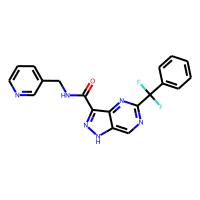
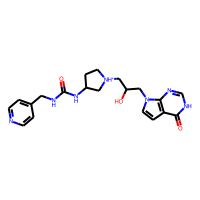
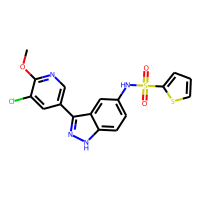
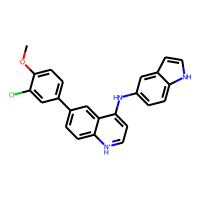
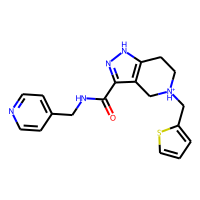

In [21]:
df.head()

In [22]:
PandasTools.AddMoleculeColumnToFrame(gen_df,'Smiles','Molecule',includeFingerprints=True)

In [26]:
gen_df = gen_df[["Title", "Molecule", "Smiles", "score"]]

In [29]:
fplist = [] #fplist
for mol in gen_df['Molecule']:
    fp = Chem.AllChem.GetMorganFingerprintAsBitVect( mol,2 )
    fplist.append(fp)

In [ ]:
gen_df['mfp2']=fplist

In [ ]:
gen_df.head(3)

In [33]:
fplist = [] #fplist
for mol in df['Molecule']:
    fp = Chem.AllChem.GetMorganFingerprintAsBitVect( mol,2 )
    fplist.append(fp)
df['mfp2']=fplist

In [36]:
from rdkit import DataStructs

for r in df.index:
#r =0
    fp1 = df.at[r,'mfp2']
    colname = df.at[r,'Title']
    simlist = [] #fplist
    for s in gen_df.index:
        mol = gen_df.at[s, 'Molecule']
        fp = Chem.AllChem.GetMorganFingerprintAsBitVect( mol,2 )
        sim =DataStructs.DiceSimilarity(fp1,fp)
        simlist.append(sim)
    gen_df[colname]=simlist


/tmp/ipykernel_3819453/2272052550.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df[colname]=simlist
/tmp/ipykernel_3819453/2272052550.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df[colname]=simlist
/tmp/ipykernel_3819453/2272052550.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [49]:
newdata = gen_df.drop(['mfp2','Smiles',"Title", "Molecule", "score"], axis=1)

In [50]:
newdata

,ligprep_alk_davis_all.maegz:3528,ligprep_alk_davis_all.maegz:4403,ligprep_alk_davis_all.maegz:1250,ligprep_alk_davis_all.maegz:2240,ligprep_alk_davis_all.maegz:4661,ligprep_alk_davis_all.maegz:993,ligprep_alk_davis_all.maegz:3513,ligprep_alk_davis_all.maegz:3736,ligprep_alk_davis_all.maegz:4975,ligprep_alk_davis_all.maegz:88,...,ligprep_alk_davis_all.maegz:3477,ligprep_alk_davis_all.maegz:52,ligprep_alk_davis_all.maegz:1063,ligprep_alk_davis_all.maegz:3916,ligprep_alk_davis_all.maegz:2055,ligprep_alk_davis_all.maegz:2752,ligprep_alk_davis_all.maegz:4630,ligprep_alk_davis_all.maegz:2126,ligprep_alk_davis_all.maegz:2818,ligprep_alk_davis_all.maegz:646
0,0.222222,0.183486,0.336634,0.164948,0.343434,0.195652,0.181818,0.183673,0.130435,0.211538,...,0.157303,0.237624,0.161616,0.176471,0.202020,0.200000,0.198020,0.189474,0.193548,0.194175
1,0.319149,0.269231,0.166667,0.108696,0.255319,0.275862,0.234043,0.258065,0.298851,0.242424,...,0.166667,0.208333,0.255319,0.288660,0.106383,0.273684,0.166667,0.177778,0.272727,0.142857
2,0.260870,0.208000,0.153846,0.088496,0.191304,0.240741,0.191304,0.228070,0.185185,0.150000,...,0.247619,0.170940,0.260870,0.254237,0.121739,0.224138,0.170940,0.234234,0.201835,0.134454
3,0.400000,0.208696,0.261682,0.194175,0.247619,0.204082,0.304762,0.230769,0.224490,0.218182,...,0.168421,0.242991,0.190476,0.240741,0.152381,0.150943,0.186916,0.118812,0.343434,0.183486
4,0.318584,0.227642,0.226087,0.144144,0.265487,0.264151,0.247788,0.232143,0.207547,0.237288,...,0.155340,0.243478,0.159292,0.241379,0.106195,0.210526,0.156522,0.146789,0.224299,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.173077,0.368421,0.264151,0.196078,0.211538,0.288660,0.288462,0.252427,0.226804,0.220183,...,0.276596,0.264151,0.153846,0.205607,0.250000,0.209524,0.245283,0.260000,0.183673,0.185185
4996,0.166667,0.245283,0.183673,0.127660,0.187500,0.314607,0.291667,0.294737,0.449438,0.237624,...,0.255814,0.244898,0.250000,0.303030,0.145833,0.288660,0.163265,0.434783,0.266667,0.200000
4997,0.220000,0.272727,0.196078,0.163265,0.240000,0.322581,0.160000,0.222222,0.215054,0.190476,...,0.377778,0.176471,0.160000,0.271845,0.160000,0.277228,0.313725,0.187500,0.191489,0.134615
4998,0.186916,0.205128,0.238532,0.228571,0.242991,0.140000,0.299065,0.245283,0.240000,0.196429,...,0.164948,0.183486,0.149533,0.254545,0.168224,0.185185,0.311927,0.330097,0.237624,0.198198


In [ ]:
cm = sns.light_palette("red", as_cmap=True)
newdata.style.background_gradient(cmap=cm)


In [59]:
newdata.loc[4660, "ligprep_alk_davis_all.maegz:4661"]

0.7777777777777778

In [76]:
newdata.sort_values("ligprep_alk_davis_all.maegz:4403",ascending=False)

,ligprep_alk_davis_all.maegz:3528,ligprep_alk_davis_all.maegz:4403,ligprep_alk_davis_all.maegz:1250,ligprep_alk_davis_all.maegz:2240,ligprep_alk_davis_all.maegz:4661,ligprep_alk_davis_all.maegz:993,ligprep_alk_davis_all.maegz:3513,ligprep_alk_davis_all.maegz:3736,ligprep_alk_davis_all.maegz:4975,ligprep_alk_davis_all.maegz:88,...,ligprep_alk_davis_all.maegz:3477,ligprep_alk_davis_all.maegz:52,ligprep_alk_davis_all.maegz:1063,ligprep_alk_davis_all.maegz:3916,ligprep_alk_davis_all.maegz:2055,ligprep_alk_davis_all.maegz:2752,ligprep_alk_davis_all.maegz:4630,ligprep_alk_davis_all.maegz:2126,ligprep_alk_davis_all.maegz:2818,ligprep_alk_davis_all.maegz:646
4402,0.298246,0.709677,0.189655,0.089286,0.385965,0.280374,0.245614,0.265487,0.242991,0.252101,...,0.211538,0.327586,0.228070,0.256410,0.140351,0.243478,0.155172,0.163636,0.296296,0.152542
1974,0.432990,0.467290,0.282828,0.084211,0.371134,0.288889,0.371134,0.229167,0.400000,0.196078,...,0.275862,0.424242,0.329897,0.300000,0.144330,0.224490,0.161616,0.215054,0.483516,0.237624
3251,0.365385,0.456140,0.226415,0.117647,0.307692,0.329897,0.307692,0.330097,0.268041,0.275229,...,0.212766,0.339623,0.230769,0.280374,0.115385,0.228571,0.150943,0.160000,0.408163,0.166667
1295,0.314815,0.440678,0.254545,0.150943,0.388889,0.316832,0.259259,0.280374,0.257426,0.318584,...,0.224490,0.381818,0.240741,0.270270,0.222222,0.311927,0.218182,0.250000,0.313725,0.232143
3236,0.456522,0.431373,0.191489,0.111111,0.456522,0.329412,0.260870,0.241758,0.211765,0.185567,...,0.292683,0.404255,0.239130,0.273684,0.152174,0.236559,0.148936,0.136364,0.372093,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0.130435,0.098039,0.106383,0.111111,0.152174,0.164706,0.173913,0.175824,0.164706,0.206186,...,0.195122,0.170213,0.108696,0.147368,0.195652,0.150538,0.170213,0.136364,0.116279,0.125000
2891,0.170213,0.096154,0.312500,0.173913,0.127660,0.183908,0.276596,0.150538,0.321839,0.121212,...,0.238095,0.145833,0.212766,0.206186,0.170213,0.147368,0.145833,0.244444,0.181818,0.204082
2625,0.084211,0.095238,0.082474,0.064516,0.084211,0.136364,0.126316,0.170213,0.068182,0.080000,...,0.211765,0.123711,0.189474,0.183673,0.063158,0.104167,0.103093,0.087912,0.134831,0.101010
556,0.123711,0.093458,0.181818,0.189474,0.144330,0.222222,0.206186,0.145833,0.200000,0.137255,...,0.137931,0.141414,0.123711,0.120000,0.144330,0.183673,0.262626,0.215054,0.109890,0.099010


In [79]:
newdata.idxmax()

ligprep_alk_davis_all.maegz:3528    3527
ligprep_alk_davis_all.maegz:4403    4402
ligprep_alk_davis_all.maegz:1250    1249
ligprep_alk_davis_all.maegz:2240    2239
ligprep_alk_davis_all.maegz:4661    4660
                                    ... 
ligprep_alk_davis_all.maegz:2752    2751
ligprep_alk_davis_all.maegz:4630    4629
ligprep_alk_davis_all.maegz:2126    2125
ligprep_alk_davis_all.maegz:2818    2817
ligprep_alk_davis_all.maegz:646      645
Length: 4990, dtype: int64

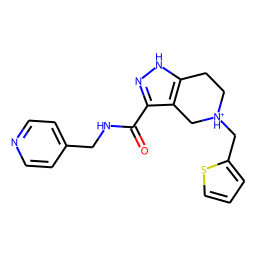

In [70]:
smiles = df["Smiles"][4]
mol = Chem.MolFromSmiles(smiles)

img = Draw.MolsToGridImage([mol], molsPerRow=1, subImgSize=(256, 256))
img

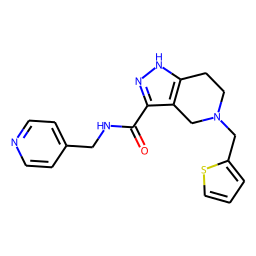

In [69]:
smiles2 = gen_df["Smiles"][4660]
mol2 = Chem.MolFromSmiles(smiles2)

img2 = Draw.MolsToGridImage([mol2], molsPerRow=1, subImgSize=(256, 256))
img2

In [74]:
newdata.loc[2239, "ligprep_alk_davis_all.maegz:2240"]

0.8076923076923077